In [1]:
#Bibliotecas
include("../../modules/Polygon/polygon.jl")

# Polígonos y Triangulaciones

El polígono puede ser ingresado empezando por cualquier punto del polígono pero es sumamente importante que los puntos se ingresen en **sentido antihorario**, de cualquier otra forma el programa fallará, en la carpeta `Ejemplos` se encuentran las configuracione de algunos polígonos para probar este notebook.

## Polígono

In [10]:
#Comenzamos instanciando un objeto de nuestra estructura polígno, el cuál esta vacío
pol = Polygon()

Polygon(0, Vertex(nothing, nothing, nothing, nothing, nothing))

In [3]:
#Para facilitar cargar los datos para el usuario la función Insertar de nuestro polígono
#se encarga de leer un conjunto de puntos en sentido antihorario de un archivo de texto
#es necesario especificar la ruta de nuestro archivo y con esto el polígono será cargado
pol.Insertar("./Ejemplos/Ejemplo_6.txt")

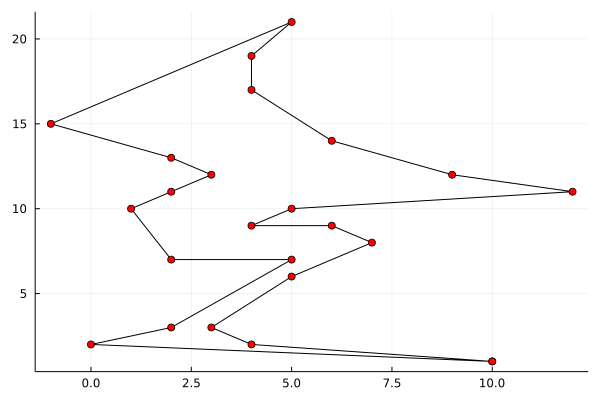

In [4]:
#Si queremos visualizar nuestro polígono podemos recurrir al siguiente método:
pol.Plot()

## Área del polígono
La magnitud del producto vectorial de dos vectores es el área del paralelogramo que determinan: Si $A$ y $B$ son vectores, entonces $| A \times B |$ es el área del paralelogramo de lados $A$ y $B$

<center><img src="./Images/fig-1.png" alt="Paralelogramo"></center>

Ya que
cualquier triángulo se puede ver como la mitad de un paralelogramo, esto brinda un método para calcular el área a partir de coordenadas. Sea $A = b — a$ y $B = c — a$. Entonces el área es la mitad de la longitud de $A \times B$.
  
El producto vectorial se puede calcular a partir del siguiente determinante, donde $\hat{i}$, $\hat{j}$ y $\hat{k}$ son vectores unitarios en las direcciones $x$, $y$ y $z$.
$$
  A = 
  \begin{vmatrix}
    \hat{i} & \hat{j} & \hat{k}\\
    A_0 & A_1 & A_2\\
    B_0 & B_1 & B_2
  \end{vmatrix} = (A_1B_2-A_2B_1)\hat{i} + (A_2B_0-A_0B_2)\hat{j} + (A_0B_1-A_1B_0)\hat{k}
$$

Para vectores bidimensionales, $A2 = B2 = 0$, por lo que el cálculo anterior se reduce a:
$$A(T)=\frac{1}{2}(A_0B_1-A_1B_0)$$

Sustituyendo $A = b — a$ y $B = c — a$ se tiene:
$$A(T)=\frac{1}{2}[(b_0-a_0)(c_1-a_1)-(c_0-a_0)(b_1-a_1)]$$

_NOTA.- Si desea detallar en la implementación de este o el resto de funciones puede revisar el módulo `Polygon` dentro de la carpeta `modules` que se encuentra en la raíz del proyecto._

In [5]:
#Para calcular el área de nuestro polígono simplemente hacemos uso de la siguiente función:
pol.Area()

67.5

## Triangulación
Finalmente se hace una cuidadosa implementación del código mostrado en el libro: "J. O’Rourke (1998), Computational Geometry In C, Cambridge University Press.", pero adaptado al lenguaje Julia, si desea profundizar en más detalles del algoritmo puede revisar el `Capítulo 1`, especialmente en la sección `1.4 IMPLEMENTATION ISSUES`

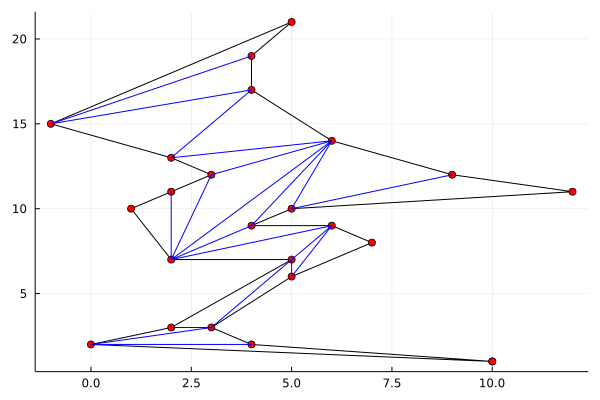

20-element Vector{Any}:
 Vector{BigInt}[[0, 2], [4, 2]]
 Vector{BigInt}[[0, 2], [3, 3]]
 Vector{BigInt}[[5, 6], [6, 9]]
 Vector{BigInt}[[5, 10], [9, 12]]
 Vector{BigInt}[[5, 10], [6, 14]]
 Vector{BigInt}[[4, 19], [-1, 15]]
 Vector{BigInt}[[2, 11], [2, 7]]
 Vector{BigInt}[[2, 3], [3, 3]]
 Vector{BigInt}[[4, 9], [6, 14]]
 Vector{BigInt}[[4, 17], [-1, 15]]
 Vector{BigInt}[[4, 17], [2, 13]]
 Vector{BigInt}[[3, 12], [2, 7]]
 Vector{BigInt}[[5, 7], [3, 3]]
 Vector{BigInt}[[5, 7], [5, 6]]
 Vector{BigInt}[[6, 14], [2, 13]]
 Vector{BigInt}[[6, 14], [3, 12]]
 Vector{BigInt}[[6, 14], [2, 7]]
 Vector{BigInt}[[4, 9], [2, 7]]
 Vector{BigInt}[[6, 9], [2, 7]]
 Vector{BigInt}[[6, 9], [5, 7]]

In [9]:
#De la misma forma intuitiva, para triangular el polígono simplemente hacemos uso de la siguiente función:
pol.Triangular()
#Si no desea ver la triangulación y sólo desea los segmentos puede incluir el argumento false dentro de la función Triangular()

# Conclusiones
Al ser nuestro primer acercamiento con el lenguaje resultó un poco complicado hacer la transición en primera instancia de lo mostrado en el libro en el lenguaje C a Julia, estudiando las capacidades y bondades del lenguaje Julia, pudimos agregar la clase BigInt que permite manipular números enteros más grandes que los que se representan habitualmente en otros lenguajes, dándole una robustes extra a nuestro algoritmo cuando se trata de puntos con unidades grandes, la librería Plots por otro lado nos permitió hacer gráficas efectivas y en poco tiempo para que los algoritmos sean más visuales y amigables para nuestros usuarios finales.
  
Una limitación al principio fue el de cómo construir nuestras estructuras de datos debido a que Julia no cuenta con manipulación de punteros, sin embargo, pudimos hacer uso de las `mutable struct` que son equivalentes a las `clases` en lenguajes de programación orientados a objetos, lo cuál nos permitió mediante referencias circulares a la misma estructura poder construir nuestros "punteros" en Julia.

El siguiente post nos ayudó mucho a entender las `mutable structs` en Julia, por lo que recomendamos ampliamente revisar su contenido si desea comprender a mejor medida lo que se hizo en esta implementación: https://acmion.com/blog/programming/2021-05-29-julia-oop/ 